In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timezone
import random
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import time
import datetime
import pickle
import gc
from tqdm import tqdm

In [9]:
stock_1 = yf.Ticker("AKBNK.IS")
stock_2 = yf.Ticker("ISCTR.IS")
stock_3 = yf.Ticker("HALKB.IS")
stock_4 = yf.Ticker("GARAN.IS")
stock_5 = yf.Ticker("YKBNK.IS")

In [10]:
akbank = stock_1.history(period = "7d", interval = "1m")
isbank = stock_2.history(period = "7d",interval = "1m")
halkbank = stock_3.history(period = "7d", interval = "1m")
garanti = stock_4.history(period = "7d", interval = "1m")
ypkredi = stock_5.history(period = "7d",interval = "1m")

In [17]:
akbank

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ts
Datetime,,,,,,,,
2023-01-12 10:30:00+03:00,16.410000,16.410000,16.389999,16.410000,0,0.0,0.0,1673508600
2023-01-12 10:31:00+03:00,16.410000,16.430000,16.400000,16.430000,227585,0.0,0.0,1673508660
2023-01-12 10:32:00+03:00,16.440001,16.480000,16.440001,16.469999,399268,0.0,0.0,1673508720
2023-01-12 10:33:00+03:00,16.469999,16.469999,16.440001,16.459999,171486,0.0,0.0,1673508780
2023-01-12 10:34:00+03:00,16.469999,16.520000,16.459999,16.510000,361932,0.0,0.0,1673508840
...,...,...,...,...,...,...,...,...
2023-01-20 17:58:00+03:00,18.740000,18.750000,18.709999,18.719999,642982,0.0,0.0,1674226680
2023-01-20 17:59:00+03:00,18.719999,18.730000,18.700001,18.730000,1206806,0.0,0.0,1674226740
2023-01-20 18:05:00+03:00,18.709999,18.709999,18.709999,18.709999,3371801,0.0,0.0,1674227100


In [18]:
isbank

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ts
Datetime,,,,,,,,
2023-01-12 10:30:00+03:00,10.66,10.66,10.63,10.66,0,0.0,0.0,1673508600
2023-01-12 10:31:00+03:00,10.66,10.67,10.65,10.67,196258,0.0,0.0,1673508660
2023-01-12 10:32:00+03:00,10.66,10.70,10.66,10.70,328407,0.0,0.0,1673508720
2023-01-12 10:33:00+03:00,10.70,10.70,10.67,10.68,294957,0.0,0.0,1673508780
2023-01-12 10:34:00+03:00,10.69,10.72,10.68,10.72,596696,0.0,0.0,1673508840
...,...,...,...,...,...,...,...,...
2023-01-20 17:59:00+03:00,12.33,12.33,12.29,12.31,947701,0.0,0.0,1674226740
2023-01-20 18:00:00+03:00,12.31,12.31,12.31,12.31,10000,0.0,0.0,1674226800
2023-01-20 18:05:00+03:00,12.29,12.29,12.29,12.29,3741161,0.0,0.0,1674227100


In [19]:
halkbank


,Open,High,Low,Close,Volume,Dividends,Stock Splits,ts
Datetime,,,,,,,,
2023-01-12 10:30:00+03:00,10.36,10.37,10.34,10.35,0,0.0,0.0,1673508600
2023-01-12 10:31:00+03:00,10.35,10.37,10.35,10.37,28777,0.0,0.0,1673508660
2023-01-12 10:32:00+03:00,10.37,10.40,10.37,10.39,54435,0.0,0.0,1673508720
2023-01-12 10:33:00+03:00,10.40,10.42,10.39,10.41,131946,0.0,0.0,1673508780
2023-01-12 10:34:00+03:00,10.41,10.44,10.41,10.43,110587,0.0,0.0,1673508840
...,...,...,...,...,...,...,...,...
2023-01-20 17:59:00+03:00,12.38,12.39,12.28,12.34,1067421,0.0,0.0,1674226740
2023-01-20 18:00:00+03:00,12.34,12.34,12.34,12.34,4400,0.0,0.0,1674226800
2023-01-20 18:05:00+03:00,12.34,12.34,12.34,12.34,1935020,0.0,0.0,1674227100


In [20]:
garanti

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ts
Datetime,,,,,,,,
2023-01-12 10:30:00+03:00,24.459999,24.480000,24.420000,24.440001,0,0.0,0.0,1673508600
2023-01-12 10:31:00+03:00,24.440001,24.500000,24.420000,24.480000,141127,0.0,0.0,1673508660
2023-01-12 10:32:00+03:00,24.500000,24.540001,24.500000,24.540001,67414,0.0,0.0,1673508720
2023-01-12 10:33:00+03:00,24.540001,24.559999,24.500000,24.540001,41338,0.0,0.0,1673508780
2023-01-12 10:34:00+03:00,24.559999,24.620001,24.559999,24.620001,84340,0.0,0.0,1673508840
...,...,...,...,...,...,...,...,...
2023-01-20 17:58:00+03:00,26.780001,26.780001,26.740000,26.740000,307327,0.0,0.0,1674226680
2023-01-20 17:59:00+03:00,26.740000,26.760000,26.700001,26.740000,222116,0.0,0.0,1674226740
2023-01-20 18:05:00+03:00,26.900000,26.900000,26.900000,26.900000,1662638,0.0,0.0,1674227100


In [21]:
ypkredi

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ts
Datetime,,,,,,,,
2023-01-12 10:30:00+03:00,8.88,8.88,8.86,8.87,0,0.0,0.0,1673508600
2023-01-12 10:31:00+03:00,8.87,8.88,8.86,8.88,777019,0.0,0.0,1673508660
2023-01-12 10:32:00+03:00,8.87,8.90,8.87,8.90,2242300,0.0,0.0,1673508720
2023-01-12 10:33:00+03:00,8.90,8.90,8.87,8.88,1063596,0.0,0.0,1673508780
2023-01-12 10:34:00+03:00,8.89,8.92,8.88,8.91,1719622,0.0,0.0,1673508840
...,...,...,...,...,...,...,...,...
2023-01-20 17:59:00+03:00,10.17,10.21,10.17,10.17,2045624,0.0,0.0,1674226740
2023-01-20 18:00:00+03:00,10.17,10.17,10.17,10.17,60000,0.0,0.0,1674226800
2023-01-20 18:05:00+03:00,10.17,10.17,10.17,10.17,6164805,0.0,0.0,1674227100


In [16]:
#we got 5stock values for 1week so that we can deal with that.
akbank['ts'] = akbank.index.values.astype(np.int64) // 10 ** 9
halkbank['ts'] = halkbank.index.values.astype(np.int64) // 10 ** 9
isbank['ts'] = isbank.index.values.astype(np.int64) // 10 ** 9
garanti['ts'] = garanti.index.values.astype(np.int64) // 10 ** 9
ypkredi['ts'] = ypkredi.index.values.astype(np.int64) // 10 ** 9

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


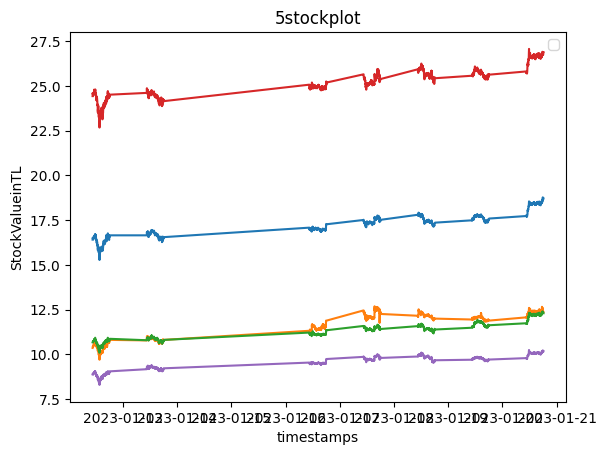

In [22]:
plt.plot(akbank.index, akbank.Close)
plt.plot(halkbank.index,halkbank.Close)
plt.plot(isbank.index,isbank.Close )
plt.plot(garanti.index,garanti.Close)
plt.plot(ypkredi.index,ypkredi.Close)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("timestamps")
plt.ylabel("StockValueinTL")
plt.title("5stockplot")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

In [61]:
rows = []
for i in range(0,akbank.shape[0]-1):
    row_data = dict(
    timestamp = akbank.ts[i],
    Close_0 = akbank.Close[i],
    Close_1 = halkbank.Close[i],
    Close_2 = isbank.Close[i],
    Close_3 = garanti.Close[i],
    Close_4 = ypkredi.Close[i],  
    Target_0 = (akbank.Close[i+1]-akbank.Close[i]),
    Target_1 = (halkbank.Close[i+1]-halkbank.Close[i]),
    Target_2 = (isbank.Close[i+1]-isbank.Close[i]),
    Target_3 = (garanti.Close[i+1]-garanti.Close[i]),
    Target_4 = (ypkredi.Close[i+1]-ypkredi.Close[i])
    )
    rows.append(row_data)
banks =pd.DataFrame(rows)

In [62]:
banks

,timestamp,Close_0,Close_1,Close_2,Close_3,Close_4,Target_0,Target_1,Target_2,Target_3,Target_4
0,1673508600,16.410000,10.35,10.66,24.440001,8.87,0.020000,0.02,0.010000,0.039999,0.010000
1,1673508660,16.430000,10.37,10.67,24.480000,8.88,0.039999,0.02,0.030000,0.060001,0.020000
2,1673508720,16.469999,10.39,10.70,24.540001,8.90,-0.010000,0.02,-0.020000,0.000000,-0.020000
3,1673508780,16.459999,10.41,10.68,24.540001,8.88,0.050001,0.02,0.040000,0.080000,0.030000
4,1673508840,16.510000,10.43,10.72,24.620001,8.91,0.000000,0.00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3150,1674226620,18.740000,12.43,12.32,26.780001,10.15,-0.020000,-0.01,-0.009999,-0.020000,0.000000
3151,1674226680,18.719999,12.42,12.31,26.760000,10.15,0.010000,-0.04,0.000000,-0.020000,0.040000
3152,1674226740,18.730000,12.38,12.31,26.740000,10.19,-0.020000,-0.04,-0.020000,0.000000,-0.009999
3153,1674227100,18.709999,12.34,12.29,26.740000,10.18,0.000000,0.00,0.000000,0.160000,-0.010000


In [63]:
df = banks

In [64]:
lags = [30,40,300,600,900,1800]

In [65]:
for id in range(5):    
    for lag in lags:
        df[f'log_close/mean_{lag}_id{id}'] = np.log( np.array(df[f'Close_{id}']) /  np.roll(np.append(np.convolve( np.array(df[f'Close_{id}']), np.ones(lag)/lag, mode="valid"), np.ones(lag-1)), lag-1)  )
        df[f'log_return_{lag}_id{id}']     = np.log( np.array(df[f'Close_{id}']) /  np.roll(np.array(df[f'Close_{id}']), lag)  )
for lag in lags:
    df[f'mean_close/mean_{lag}'] =  np.mean(df.iloc[:,df.columns.str.startswith(f'log_close/mean_{lag}_id')], axis=1)
    df[f'mean_log_returns_{lag}'] = np.mean(df.iloc[:,df.columns.str.startswith(f'log_return_{lag}_id')] ,    axis=1)
for lag in lags:
    for id in range(5):
        df[f'log_close/mean_{lag}-mean_close/mean_{lag}_id{id}'] = np.array( df[f'log_close/mean_{lag}_id{id}']) - np.array( df[f'mean_close/mean_{lag}']  )
        df[f'log_return_{lag}-mean_log_returns_{lag}_id{id}']    = np.array( df[f'log_return_{lag}_id{id}'])     - np.array( df[f'mean_log_returns_{lag}'] )

In [66]:
df

,timestamp,Close_0,Close_1,Close_2,Close_3,Close_4,Target_0,Target_1,Target_2,Target_3,...,log_close/mean_1800-mean_close/mean_1800_id0,log_return_1800-mean_log_returns_1800_id0,log_close/mean_1800-mean_close/mean_1800_id1,log_return_1800-mean_log_returns_1800_id1,log_close/mean_1800-mean_close/mean_1800_id2,log_return_1800-mean_log_returns_1800_id2,log_close/mean_1800-mean_close/mean_1800_id3,log_return_1800-mean_log_returns_1800_id3,log_close/mean_1800-mean_close/mean_1800_id4,log_return_1800-mean_log_returns_1800_id4
0,1673508600,16.410000,10.35,10.66,24.440001,8.87,0.020000,0.02,0.010000,0.039999,...,0.221837,0.031387,-0.239068,-0.087854,-0.209556,0.015579,0.620167,0.048714,-0.393380,-0.007826
1,1673508660,16.430000,10.37,10.67,24.480000,8.88,0.039999,0.02,0.030000,0.060001,...,0.221685,0.032808,-0.238507,-0.087447,-0.209988,0.013251,0.620432,0.049612,-0.393622,-0.008223
2,1673508720,16.469999,10.39,10.70,24.540001,8.90,-0.010000,0.02,-0.020000,0.000000,...,0.221744,0.031758,-0.238953,-0.088192,-0.209553,0.013448,0.620508,0.049366,-0.393746,-0.006380
3,1673508780,16.459999,10.41,10.68,24.540001,8.88,0.050001,0.02,0.040000,0.080000,...,0.221697,0.032695,-0.236469,-0.085301,-0.210863,0.009935,0.621069,0.050333,-0.395434,-0.007662
4,1673508840,16.510000,10.43,10.72,24.620001,8.91,0.000000,0.00,0.000000,0.000000,...,0.221667,0.029360,-0.237613,-0.085485,-0.210188,0.011628,0.621260,0.050674,-0.395125,-0.006176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,1674226620,18.740000,12.43,12.32,26.780001,10.15,-0.020000,-0.01,-0.009999,-0.020000,...,0.016420,0.026669,-0.019532,-0.038195,0.014181,0.021620,-0.002601,0.003541,-0.008468,-0.013634
3151,1674226680,18.719999,12.42,12.31,26.760000,10.15,0.010000,-0.04,0.000000,-0.020000,...,0.016023,0.027130,-0.019628,-0.039191,0.014043,0.021484,-0.002664,0.003386,-0.007774,-0.012809
3152,1674226740,18.730000,12.38,12.31,26.740000,10.19,-0.020000,-0.04,-0.020000,0.000000,...,0.016443,0.026797,-0.022928,-0.043284,0.013932,0.020617,-0.003511,0.002556,-0.003936,-0.006686
3153,1674227100,18.709999,12.34,12.29,26.740000,10.18,0.000000,0.00,0.000000,0.160000,...,0.016742,0.026223,-0.024756,-0.045216,0.013676,0.022093,-0.002131,0.003051,-0.003532,-0.006152


In [67]:
list(df.columns)

['timestamp',
 'Close_0',
 'Close_1',
 'Close_2',
 'Close_3',
 'Close_4',
 'Target_0',
 'Target_1',
 'Target_2',
 'Target_3',
 'Target_4',
 'log_close/mean_30_id0',
 'log_return_30_id0',
 'log_close/mean_40_id0',
 'log_return_40_id0',
 'log_close/mean_300_id0',
 'log_return_300_id0',
 'log_close/mean_600_id0',
 'log_return_600_id0',
 'log_close/mean_900_id0',
 'log_return_900_id0',
 'log_close/mean_1800_id0',
 'log_return_1800_id0',
 'log_close/mean_30_id1',
 'log_return_30_id1',
 'log_close/mean_40_id1',
 'log_return_40_id1',
 'log_close/mean_300_id1',
 'log_return_300_id1',
 'log_close/mean_600_id1',
 'log_return_600_id1',
 'log_close/mean_900_id1',
 'log_return_900_id1',
 'log_close/mean_1800_id1',
 'log_return_1800_id1',
 'log_close/mean_30_id2',
 'log_return_30_id2',
 'log_close/mean_40_id2',
 'log_return_40_id2',
 'log_close/mean_300_id2',
 'log_return_300_id2',
 'log_close/mean_600_id2',
 'log_return_600_id2',
 'log_close/mean_900_id2',
 'log_return_900_id2',
 'log_close/mean_18

In [68]:
df

,timestamp,Close_0,Close_1,Close_2,Close_3,Close_4,Target_0,Target_1,Target_2,Target_3,...,log_close/mean_1800-mean_close/mean_1800_id0,log_return_1800-mean_log_returns_1800_id0,log_close/mean_1800-mean_close/mean_1800_id1,log_return_1800-mean_log_returns_1800_id1,log_close/mean_1800-mean_close/mean_1800_id2,log_return_1800-mean_log_returns_1800_id2,log_close/mean_1800-mean_close/mean_1800_id3,log_return_1800-mean_log_returns_1800_id3,log_close/mean_1800-mean_close/mean_1800_id4,log_return_1800-mean_log_returns_1800_id4
0,1673508600,16.410000,10.35,10.66,24.440001,8.87,0.020000,0.02,0.010000,0.039999,...,0.221837,0.031387,-0.239068,-0.087854,-0.209556,0.015579,0.620167,0.048714,-0.393380,-0.007826
1,1673508660,16.430000,10.37,10.67,24.480000,8.88,0.039999,0.02,0.030000,0.060001,...,0.221685,0.032808,-0.238507,-0.087447,-0.209988,0.013251,0.620432,0.049612,-0.393622,-0.008223
2,1673508720,16.469999,10.39,10.70,24.540001,8.90,-0.010000,0.02,-0.020000,0.000000,...,0.221744,0.031758,-0.238953,-0.088192,-0.209553,0.013448,0.620508,0.049366,-0.393746,-0.006380
3,1673508780,16.459999,10.41,10.68,24.540001,8.88,0.050001,0.02,0.040000,0.080000,...,0.221697,0.032695,-0.236469,-0.085301,-0.210863,0.009935,0.621069,0.050333,-0.395434,-0.007662
4,1673508840,16.510000,10.43,10.72,24.620001,8.91,0.000000,0.00,0.000000,0.000000,...,0.221667,0.029360,-0.237613,-0.085485,-0.210188,0.011628,0.621260,0.050674,-0.395125,-0.006176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,1674226620,18.740000,12.43,12.32,26.780001,10.15,-0.020000,-0.01,-0.009999,-0.020000,...,0.016420,0.026669,-0.019532,-0.038195,0.014181,0.021620,-0.002601,0.003541,-0.008468,-0.013634
3151,1674226680,18.719999,12.42,12.31,26.760000,10.15,0.010000,-0.04,0.000000,-0.020000,...,0.016023,0.027130,-0.019628,-0.039191,0.014043,0.021484,-0.002664,0.003386,-0.007774,-0.012809
3152,1674226740,18.730000,12.38,12.31,26.740000,10.19,-0.020000,-0.04,-0.020000,0.000000,...,0.016443,0.026797,-0.022928,-0.043284,0.013932,0.020617,-0.003511,0.002556,-0.003936,-0.006686
3153,1674227100,18.709999,12.34,12.29,26.740000,10.18,0.000000,0.00,0.000000,0.160000,...,0.016742,0.026223,-0.024756,-0.045216,0.013676,0.022093,-0.002131,0.003051,-0.003532,-0.006152


In [70]:
df.to_csv("banks",index = False)